# keras

In [121]:
import tensorflow as tf

In [122]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [123]:
tf.test.gpu_device_name()

2022-02-08 15:14:41.242412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 15:14:41.242851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 15:14:41.243149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 15:14:41.243507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 15:14:41.243813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

'/device:GPU:0'

In [4]:
gpu=tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_virtual_device_configuration(
    gpu,
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)]
)

2022-02-08 09:51:52.169781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 09:51:52.170381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 09:51:52.170843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [136]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [6]:
temp = np.array([32.13, 25.95, 27.95, 26.3, 26.33, 32.78, 31.48, 
    32.63, 28.2, 31.82, 25.52, 27.42, 28.92, 30.17, 
    29.09, 31.38, 29.52, 27.83, 30.27, 26.91])
elec = np.array([364.5, 105.82, 147.28, 89.57, 114.05, 411.23, 
    301.93, 386.16, 149.09, 327.93, 111.67, 130.59, 180.6, 
    214.77, 188.84, 312.11, 194.13, 135.12, 236.75, 113.6])

In [7]:
df = pd.DataFrame( np.array( [elec, temp] ).T, columns=['elec', 'temp'] )
df.sort_values(by='temp', inplace=True, ignore_index=True)
df

,elec,temp
0,111.67,25.52
1,105.82,25.95
2,89.57,26.30
3,114.05,26.33
4,113.60,26.91
5,130.59,27.42
6,135.12,27.83
7,147.28,27.95
8,149.09,28.20
9,180.60,28.92


In [8]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

2022-02-07 16:25:20.816863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:25:20.817524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:25:20.818011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:25:20.818545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 16:25:20.819030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [28]:
model = tf.keras.models.Sequential()

# layer는 생성된 모델 객체에 add를 통해서 쉽게 추가
model.add( tf.keras.layers.Dense(1, input_shape=x.shape) )

# 최적화 옵션
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [29]:
history = model.fit(x, y, epochs=100000, verbose=0)

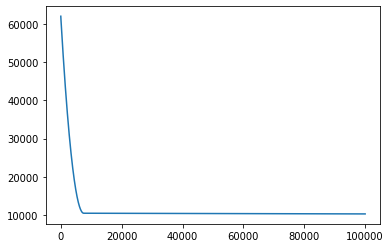

In [30]:
plt.plot( history.history['loss'] )

In [31]:
model.get_weights()

[array([[3.7808366]], dtype=float32), array([99.95074], dtype=float32)]

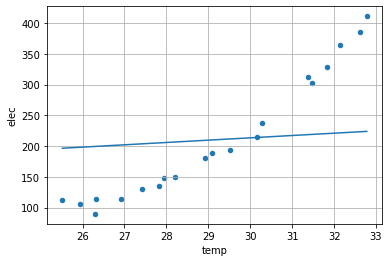

In [32]:
df.plot(kind='scatter', x='temp', y='elec')
plt.plot( df['temp'].to_numpy(), model.predict( df[['temp']]).flatten() )
plt.grid()
plt.show()

## 비선형 모델로 
- 케라스를 사용

In [38]:
x = tf.constant(df[['temp']].to_numpy(), dtype=tf.float64)
y = tf.constant(df['elec'].to_numpy(), dtype=tf.float64)

In [56]:
model = tf.keras.models.Sequential()

# hidden layer
model.add( tf.keras.layers.Dense(10, activation='tanh',input_shape=x.shape))
model.add( tf.keras.layers.Dense(4, activation='tanh'))

#output layer
model.add( tf.keras.layers.Dense(1) )

# 최적화 옵션
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(
  loss='mse', 
  optimizer = optimizer
)

In [61]:
model.fit(x, y, epochs=100000, verbose=0)

In [62]:
model.get_weights()

[array([[ 0.17687786, -0.37858772,  0.1158531 ,  0.60259   , -0.09894369,
          0.2905839 ,  0.11191368, -0.6344857 ,  0.1056811 ,  0.3706795 ]],
       dtype=float32),
 array([ 0.11403474,  0.        ,  0.15510234,  0.        , -0.13337697,
         0.09901445,  0.10487773,  0.        ,  0.14750595,  0.08368863],
       dtype=float32),
 array([[ 1.0601436 ,  0.729553  , -1.145694  ,  1.2233331 ],
        [-0.82875544, -0.09920863, -0.06126315, -0.5353548 ],
        [ 0.8725699 ,  0.817056  , -1.1554672 ,  0.7954202 ],
        [ 0.52778244,  0.15180594, -0.556766  ,  0.6545854 ],
        [-1.2093737 , -1.0769287 ,  0.88410234, -0.5442693 ],
        [ 0.6716987 ,  0.87325317, -0.86566883,  0.27553695],
        [ 0.8929946 ,  1.271157  , -0.9787216 ,  0.26236364],
        [-0.9774819 , -0.80986756,  0.5128763 , -0.9217544 ],
        [ 0.19912978,  0.7709101 , -0.668162  ,  0.6846825 ],
        [ 0.29093376,  0.8630094 , -0.6822091 ,  1.3057133 ]],
       dtype=float32),
 array([ 0.42

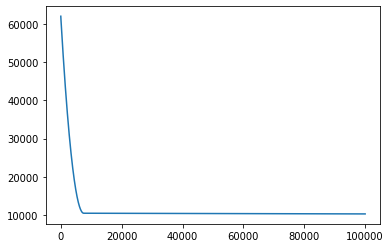

In [63]:
plt.plot( history.history['loss'] )

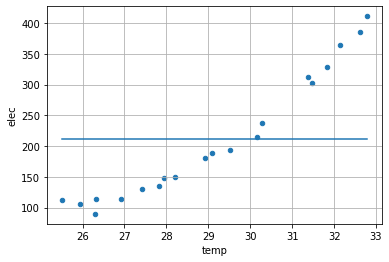

In [64]:
df.plot(kind='scatter', x='temp', y='elec')
plt.plot( df['temp'].to_numpy(), model.predict( df[['temp']]).flatten() )
plt.grid()
plt.show()

# 다른 예시

In [13]:
np.random.seed(123)
x = np.linspace(-1, 1, 100)
y = x ** 2 + 1.5 * x + 0.5 * (2 * np.random.rand(len(x))-1)

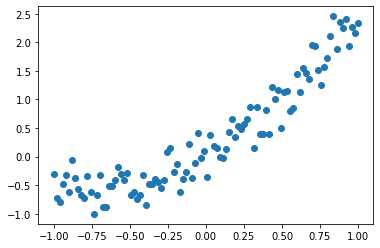

In [14]:
plt.plot( x, y, 'o')

In [24]:
x = tf.constant(x, dtype=tf.float64)
y = tf.constant(y, dtype=tf.float64) # input layer라고 보면 됨

In [25]:
model = tf.keras.models.Sequential()

model.add( tf.keras.layers.Dense(1, input_dim=1) ) # 1차원은 dim만 설정해주면됨

# 최적화 옵션
model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [30]:
hist = model.fit(x, y, epochs=2000, verbose=0)

In [31]:
hist.history['loss'][:10]

[0.14637523889541626,
 0.14608651399612427,
 0.14603739976882935,
 0.14597465097904205,
 0.1459444910287857,
 0.1458740085363388,
 0.14625123143196106,
 0.14596648514270782,
 0.14616185426712036,
 0.14631099998950958]

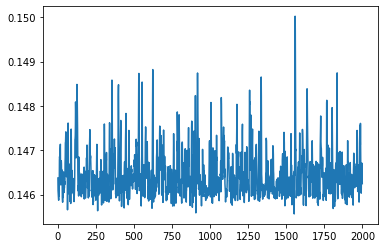

In [32]:
plt.plot( hist.history['loss'] )

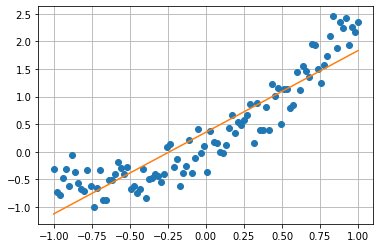

In [33]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

## 비선형 
- sigmoid 사용

In [34]:
model = tf.keras.models.Sequential()

# hidden layer
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_dim=1))

# hidden layer
model.add( tf.keras.layers.Dense(4, activation='sigmoid') )

# output layer
model.add( tf.keras.layers.Dense(1) )

# 최적화 옵션
model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [37]:
hist=model.fit(x, y, epochs=10000, verbose=0)

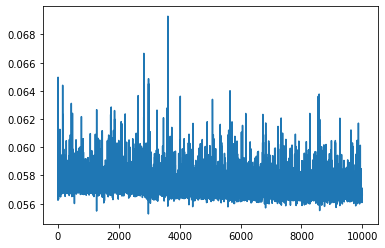

In [38]:
plt.plot(hist.history['loss'])

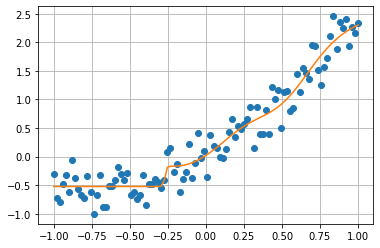

In [39]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

## 과적합

In [40]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_dim=1))
model.add( tf.keras.layers.Dense(4, activation='sigmoid') )
model.add( tf.keras.layers.Dense(1) )

model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [41]:
hist = model.fit(x, y, epochs=100000, verbose=0)

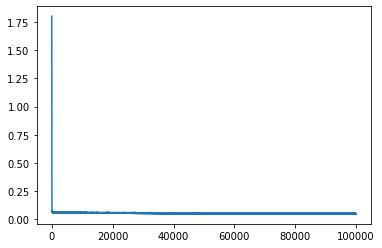

In [42]:
plt.plot(hist.history['loss'])

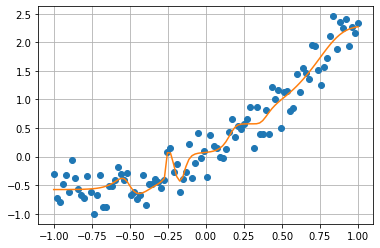

In [43]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

### Drop Out
- 필요 없는 노드를 **삭제**하면서 과적합 해결
- 이를 통해 모형의 복잡도를 줄임
- 어떤 노드 삭제? : **랜덤하게 아무거나**
- 삭제할 **비율**을 설정
- dropout도 하나의 레이어로 설정

In [44]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(10, activation='sigmoid', input_dim=1))


#drop out layer - 랜덤하게 0.5 비율로 삭제됨
model.add(tf.keras.layers.Dropout(0.5))


model.add( tf.keras.layers.Dense(4, activation='sigmoid') )
model.add( tf.keras.layers.Dense(1) )

model.compile(
  loss='mse', 
  optimizer = tf.keras.optimizers.Adam(0.01)
)

In [45]:
hist = model.fit(x, y, epochs=100000, verbose=0)

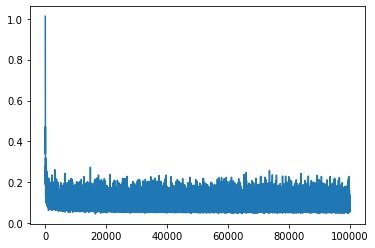

In [46]:
plt.plot(hist.history['loss'])

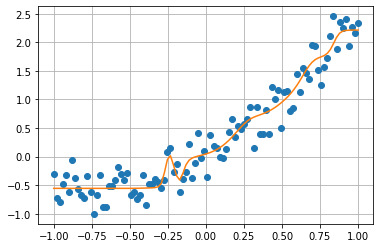

In [47]:
plt.plot( x, y, 'o')
plt.plot( x, model.predict(x) )
plt.grid()
plt.show()

# 분류 모형

In [52]:
from sklearn import datasets

In [53]:
x, y = datasets.make_blobs( 
  n_samples=1000, center_box=(-1, 1), centers=10, cluster_std=0.1, random_state=3)
y %= 2

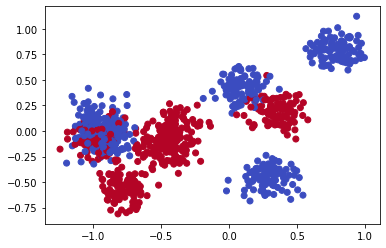

In [54]:
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

## 네트워크 구성
- 손실 함수 정의
- 분류 모형이 다를 때마다 손실 함수가 달라짐

 - class BinaryCrossentropy: 이진법
 - class CategoricalCrossentropy
 - class LogCosh:예측 오차의 쌍곡선 코사인의 로그, 회귀곡선
 
- 네트워크 구성은 동일하고 분류모형만 다름

### 학습

In [79]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)) )
model.add( tf.keras.layers.Dense(4, activation='relu') )
model.add( tf.keras.layers.Dense(1, activation='relu') )

# 네트워크와 활성함수(activation)에 따라 모양이 달라짐

model.compile(
  loss='log_cosh', 
  metrics = ['accuracy'], # 정확도
  optimizer = tf.keras.optimizers.Adam(0.01)
)

**batch_size**
- 나눠서 최적화 진행

In [80]:
hist = model.fit( x, y, epochs=1000, batch_size=100, verbose=0) # 총 1000개의 데이터를 100개씩 따로 최적화 진행(총 10번)

In [81]:
hist.history.keys() # 손실과 정확도 모두 판단 가능

dict_keys(['loss', 'accuracy'])

### 평가

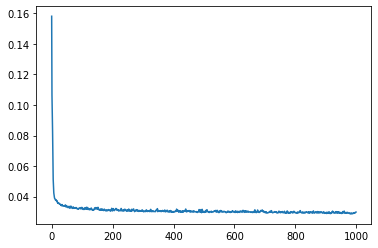

In [82]:
plt.plot(hist.history['loss'])     # 감소

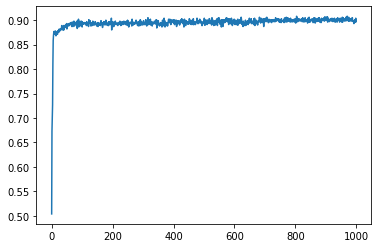

In [83]:
plt.plot(hist.history['accuracy']) # 증가

In [84]:
hist.history['accuracy'][-1]

0.8970000147819519

### 시각화

In [85]:
def contours2D(model, x1, x2, h=0.01, **params):
  xx1, xx2 = np.meshgrid(
    np.arange(x1.min() - 0.1, x1.max() + 0.1, h), 
    np.arange(x2.min() - 0.1 , x2.max() + 0.1 , h)
  )

  y = model.predict(np.c_[xx1.flatten(), xx2.flatten()])
  y = y.reshape(xx1.shape)
  result = plt.contourf(xx1, xx2, y, **params)
  return result

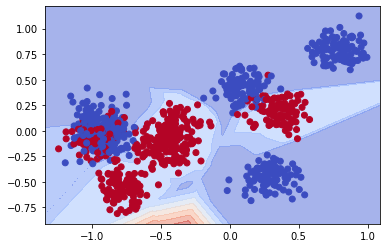

In [86]:
contours2D(model, x[:,0], x[:, 1], c=y, cmap='coolwarm',alpha=0.5)
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')
